In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorboard as tb
from collections import defaultdict
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import cv2

path_to_heatmap = "./benchmarking/distance_1/heatmaps/"
path_to_results = "./benchmarking/distance_1/results/internal"
path_to_catheter = "./data/Figures/Catheter/"

In [3]:
data = np.load("../BackUp/cathsim/benchmarking/distance_1/results/internal/PPO_scene_2_bca_MlpPolicy.npz",allow_pickle=True)
for key, values in data.items():
    print(key)

forces = data['all_forces']
print(forces)

forces
rewards
max_forces
all_forces
successes
[0.00421716 0.06702324 0.05271093 ... 0.01594735 0.03580505 0.03997494]


In [290]:
def describe_data(path):
    columns=["Algorithm","Aorta","Target","Policy","Reward","Force", "Max Force"]
    data = {"Algorithm":[],"Aorta":[],"Target":[],"Policy":[],"Reward":[],"Force":[], "Max Force":[]}
    for file in os.listdir(path):
        row = []
        filepath = os.path.join(path, file)
        print(filepath)
        data = np.load(filepath, allow_pickle=True)
        splitted =file.split("_")
        splitted.pop(1)
        splitted[-1]= splitted[-1][:-4]
        row.extend(splitted)
        for key, values in data.items():
            if key == "rewards":
                rewards = f"{np.mean(values):.2f}+-{np.std(values):.2f}" 
                row.append(rewards)
                print(f"reward: {rewards}")
            elif key == "forces":
                forces = f"{np.mean(values):.2f}+-{np.std(values):.2f}"
                row.append(forces)
                print(f"forces: {forces}")
            elif key == "max_forces":
                max_forces = f"{np.mean(values):.2f}+-{np.std(values):.2f}"
                row.append(max_forces)
                print(f"max forces: {max_forces}")
    return 
describe_data(path_to_results)


./benchmarking/distance_1/results/internal/PPO_scene_2_bca_MlpPolicy.npz
forces: 0.00+-0.00
reward: -17.61+-15.82
max forces: 0.14+-0.09
./benchmarking/distance_1/results/internal/A2C_scene_2_lca_MlpPolicy.npz
forces: 0.01+-0.00
reward: -6.28+-5.48
max forces: 0.15+-0.06
./benchmarking/distance_1/results/internal/A2C_scene_1_lca_MlpPolicy.npz
forces: 0.00+-0.00
reward: -172.99+-22.03
max forces: 0.18+-0.32
./benchmarking/distance_1/results/internal/PPO_scene_2_lca_MlpPolicy.npz
forces: 0.01+-0.00
reward: -4.62+-5.13
max forces: 0.12+-0.07
./benchmarking/distance_1/results/internal/A2C_scene_1_bca_MlpPolicy.npz
forces: 0.00+-0.00
reward: -178.03+-18.52
max forces: 0.16+-0.26
./benchmarking/distance_1/results/internal/PPO_scene_1_lca_MlpPolicy.npz
forces: 0.00+-0.00
reward: -154.49+-41.82
max forces: 0.16+-0.19
./benchmarking/distance_1/results/internal/A2C_scene_2_bca_MlpPolicy.npz
forces: 0.01+-0.00
reward: -11.62+-8.80
max forces: 0.12+-0.07
./benchmarking/distance_1/results/internal/

In [506]:
def describe_data(path, kind="Rewards"):
    columns=["Algorithm","Aorta","Target","Policy", kind.replace("_", " ").title()]
    df = {"Algorithm":[],"Aorta":[],"Target":[],"Policy":[], kind.replace("_", " ").title():[]}
    for file in os.listdir(path):
        row = []
        filepath = os.path.join(path, file)
        data = np.load(filepath, allow_pickle=True)
        splitted =file.split("_")
        splitted.pop(1)
        splitted[-1]= splitted[-1][:3]
        if splitted[2] == "lca":
            splitted[2] = "LCCA"
        elif splitted[2] == "bca":
            splitted[2] = "BCA"
        if splitted[3] == "Mlp":
            splitted[3] = "MLP"
        elif splitted[3] == "Cnn":
            splitted[3] = "CNN"
        row.extend(splitted)
        for key, values in data.items():
            if key == kind.lower():
                for value in values:
                    df["Algorithm"].append(row[0])
                    df["Aorta"].append(row[1])
                    df["Target"].append(row[2])
                    df["Policy"].append(row[3])
                    df[kind.replace("_", " ").title()].append(value)
    return pd.DataFrame(df)

path_to_results = "./benchmarking/distance_1/results/image_1"
df = describe_data(path_to_results, kind="rewards")
df[(df['Policy']=="CNN") & (df['Algorithm']=="A2C") & (df['Aorta']=="2") & (df['Target']=="LCCA")].describe()

,Rewards
count,30.000000
mean,-8.287017
std,11.632599
min,-34.823109
25%,-3.455513
50%,-3.226958
75%,-3.044846
max,-2.871640


In [356]:
for force in ["all_forces","max_forces"]:
    for target in ["BCA", "LCCA"]:
        df[(df['Policy']=="MLP") & (df['Algorithm']=="A2C") & (df['Aorta']=="2") & (df['Target']==target)].describe()

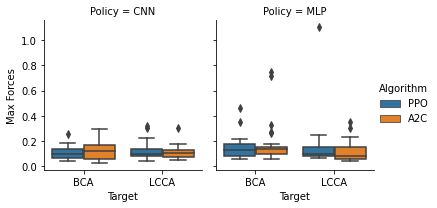

In [150]:
def make_boxplot(obs_type, kind, aorta="1", policy="Mlp"):
    path = f"./benchmarking/distance_1/results/{obs_type}"
    df = describe_data(path, kind)
    df = df[(df["Aorta"]==aorta)]
#     plot = sns.boxplot(y="Target", x= kind.replace("_", " ").title(), data=aorta_1, hue="Algorithm", palette="deep", orient="h")
    plot = sns.catplot(x="Target", y="Max Forces", hue="Algorithm", col="Policy", data=df, kind="box", height=3, aspect=0.9, hue_order=["PPO", "A2C"])

make_boxplot("image_1", "max_forces")

/home/tudorjnu/.miniconda3/envs/cathsim/lib/python3.9/site-packages/seaborn/categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


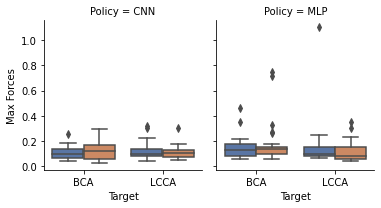

In [189]:
def make_boxplot(obs_type, kind, aorta="1", legend=False, aspect=0.9,ax=0):
    path = f"./benchmarking/distance_1/results/{obs_type}"
    df = describe_data(path, kind)
    df = df[(df["Aorta"]==aorta)]
    ax = sns.catplot(x="Target", y="Max Forces", hue="Algorithm", col="Policy", data=df, kind="box", height=3, aspect=aspect, order=["BCA","LCCA"],hue_order=["PPO", "A2C"], legend=legend, palette="deep",ax=ax)
    return ax

plot = make_boxplot("image_1", "max_forces")

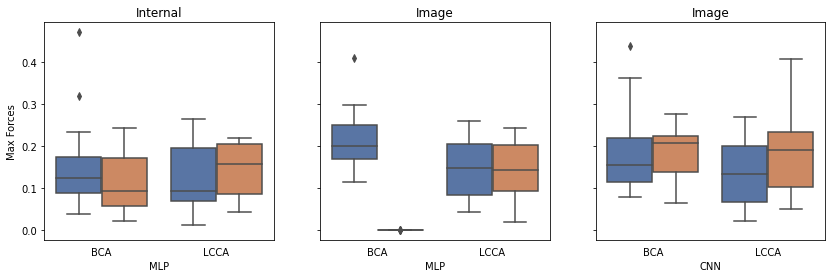

In [288]:
from matplotlib.legend import _get_legend_handles_labels

def make_boxplot(kind, aorta="1", legend=False, aspect=0.9,ax=0):
    fig, axs = plt.subplots(ncols=3, sharey=True, figsize=(14,4), squeeze=True)
    path = f"./benchmarking/distance_1/results/internal"
    df = describe_data(path, kind)
    df = df[(df["Aorta"]==aorta)]
    sns.boxplot(x="Target",y="Max Forces", hue="Algorithm", data=df, order=["BCA","LCCA"],hue_order=["PPO", "A2C"], palette="deep",ax=axs[0])
#     axs[0].legend(legend)
#     axs[0]._legend.remove()
    path = f"./benchmarking/distance_1/results/image_1"
    df = describe_data(path, kind)
    df = df[(df["Aorta"]==aorta)]
    sns.boxplot(x="Target",y="Max Forces", hue="Algorithm", data=df[df["Policy"]=="CNN"], order=["BCA","LCCA"],hue_order=["PPO", "A2C"], palette="deep",ax=axs[1])
#     ax2.legend(legend)
    sns.boxplot(x="Target",y="Max Forces", hue="Algorithm", data=df[df["Policy"]=="MLP"], order=["BCA","LCCA"],hue_order=["PPO", "A2C"], palette="deep",ax=axs[2])   
#     ax3.legend(legend)
#     ax = sns.catplot(x="Target", y="Max Forces", hue="Algorithm", col="Policy", data=df, kind="box", height=3, aspect=aspect, order=["BCA","LCCA"],hue_order=["PPO", "A2C"], legend=legend, palette="deep",ax=ax)
    axs[0].tick_params(bottom=False)
    axs[0].set(xlabel="MLP", title="Internal")
    axs[0].get_legend().remove()
    axs[1].tick_params(bottom=False)
    axs[1].set(ylabel=None, xlabel="MLP", title="Image")
    axs[1].get_legend().remove()
    axs[2].tick_params(bottom=False)
    axs[2].set(ylabel=None, xlabel="CNN", title="Image")
    axs[2].get_legend().remove()
    handles = _get_legend_handles_labels(fig.axes)[0][:2]
#     fig.legend(bbox_to_anchor=(1.02, 1), loc='upper right', borderaxespad=0,labels=["PPO", "A2C"], handles=handles)
make_boxplot(kind="max_forces", aorta="2")

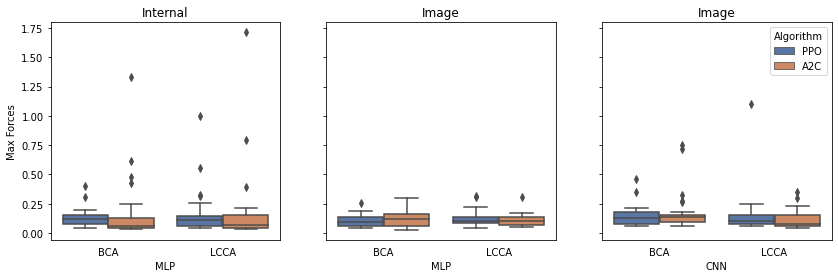

In [287]:
make_boxplot(kind="max_forces", aorta="1")

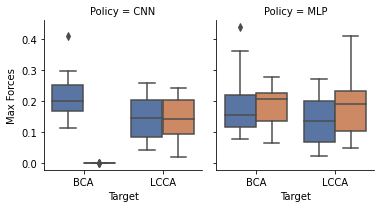

In [176]:
make_boxplot("image_1", "max_forces", aorta="2")

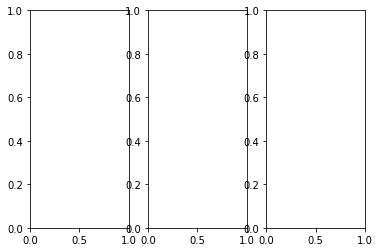

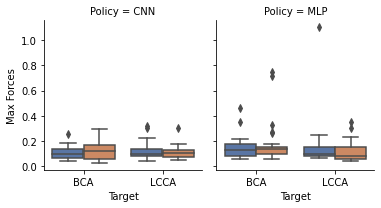

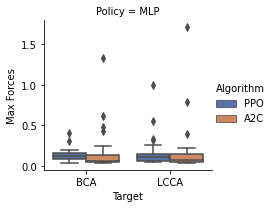

In [186]:
fig, axs = plt.subplots(ncols=3)
make_boxplot("image_1", "max_forces")
make_boxplot("internal", "max_forces", aorta="1", legend=True, aspect=1.1)

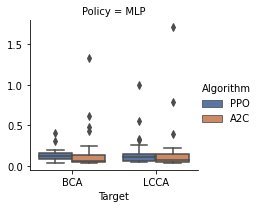

In [177]:


ax = make_boxplot("internal", "max_forces", aorta="1", legend=True, aspect=1.1)
ax.set(ylabel=None)

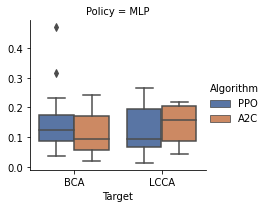

In [178]:
ax = make_boxplot("internal", "max_forces", aorta="2", legend=True, aspect=1.1)
ax.set(ylabel=None)

In [ ]:
g = sns.catplot(x="Aorta", y="Max Forces", hue="Algorithm", col="time", data=df, kind="box", height=4, aspect=.7);

TypeError: boxplot() got an unexpected keyword argument 'pallete'

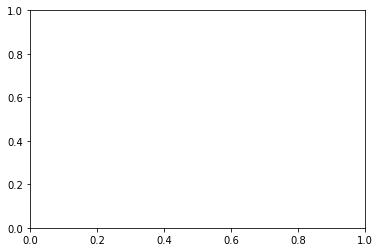

In [94]:
def make_boxplot(obs_type, kind, aorta="1", policy="Mlp"):
    path = f"./benchmarking/distance_1/results/{obs_type}"
    df = describe_data(path, kind)
    df = df[(df["Aorta"]=="2") & (df["Policy"]== "Mlp")]
    plot = sns.boxplot(x="Target", y= kind.replace("_", " ").title(), data=aorta_1, hue="Algorithm")
    return plot

make_boxplot("internal", "max_forces")

<AxesSubplot:xlabel='Target', ylabel='Max Forces'>

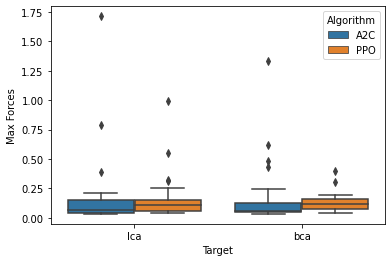

In [65]:
import seaborn as sns
aorta_1 = df[df["Aorta"]=="1"]
sns.boxplot(x="Target", y="Max Forces", data=aorta_1, hue="Algorithm")

<AxesSubplot:xlabel='Target', ylabel='Max Forces'>

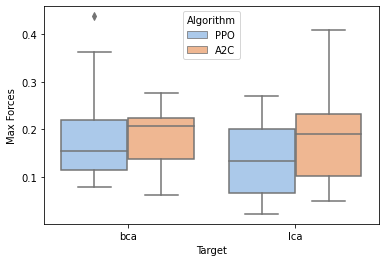

In [78]:
df = describe_data("./benchmarking/distance_1/results/image_1", kind="max_forces")
aorta_2_mlp = df[(df["Aorta"]=="2") & (df["Policy"]== "Mlp")]
sns.boxplot(x="Target", y="Max Forces", data=aorta_2_mlp,hue="Algorithm", palette="pastel")

In [129]:


#img = cv2.imread('./Heatmap/aorta_image.png', 0)
img = cv2.imread('./Heatmap/aorta.png', 0)[:,:, np.newaxis]
img = np.tile(img,3)

force_img = cv2.imread('./Heatmap/force.png', 0)
force_img2 = cv2.imread('./Heatmap/force2.png', 0)
#force_img = (force_img + force_img2) 
force_img = (force_img + force_img2)
heatmap_img = cv2.applyColorMap(force_img, cv2.COLORMAP_JET)

fin = cv2.addWeighted(heatmap_img, 0.8, img, 0.3, 0)
plt.imshow(fin)
plt.axis(False)

[ WARN:0@7592.790] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('./Heatmap/aorta.png'): can't open/read file: check file path/integrity


TypeError: 'NoneType' object is not subscriptable

In [408]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./data/Figures/Heatmap/aorta_1/aorta.png', 0)
img = np.where(img>=150,255,img)[:,:, np.newaxis]
img = np.tile(img,3)
force_img = cv2.imread('./Heatmap/aorta_1/force.png', 0)
force_img2 = cv2.imread('./Heatmap/aorta_1/force2.png', 0)
#force_img = (force_img + force_img2) 
force_img = (force_img + force_img2)

heatmap_img = cv2.applyColorMap(force_img, cv2.COLORMAP_TURBO)
fin = np.where(force_img[:,:,np.newaxis]==0, img, heatmap_img)
plt.imshow(fin, alpha=1)
plt.axis(False)

[ WARN:0@71902.122] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('./data/Figures/Heatmap/aorta_1/aorta.png'): can't open/read file: check file path/integrity


TypeError: '>=' not supported between instances of 'NoneType' and 'int'

In [387]:
img = cv2.imread('./Heatmap/aorta_2/aorta.png', 0)[:,:, np.newaxis]
img = np.where(img>=215, 255, img)

img = np.tile(img,3)
force_img1 = cv2.imread('./Heatmap/aorta_2/force_1.png', 0)
force_img2 = cv2.imread('./Heatmap/aorta_2/force_4.png', 0)
force_img3 = cv2.imread('./Heatmap/aorta_2/force_5.png', 0)
force_img = (force_img1 + force_img2 + force_img3)
force_img = np.mean(np.array([force_img1, force_img2, force_img3]), axis=0)
cv2.imwrite('./Heatmap/aorta_2/force.png', force_img)
force_img = cv2.imread('./Heatmap/aorta_2/force.png', 0)
heatmap_img = cv2.applyColorMap(force_img, cv2.COLORMAP_JET)
print(heatmap_img.max())
# plt.imshow(heatmap_img)
fin = cv2.addWeighted(heatmap_img, 0.7, img, 0.3, 0)
fin = np.where(force_img[:,:,np.newaxis]==0, img, fin)

plt.imshow(fin, alpha=1)
plt.axis(False)

[ WARN:0@71550.239] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('./Heatmap/aorta_2/aorta.png'): can't open/read file: check file path/integrity


TypeError: 'NoneType' object is not subscriptable

In [388]:
img = cv2.imread('./Heatmap/aorta_1.png', 0)
img = np.where(img>=150, 255, img+80)[:,:, np.newaxis]
img = np.tile(img,3)

force_img = cv2.imread('./Heatmap/scene_1_lca/force.png', 0)
heatmap_img = cv2.applyColorMap(force_img, cv2.COLORMAP_JET)
fin = cv2.addWeighted(heatmap_img, 0.7, img, 0.3, 0)
tilled_force = np.tile(force_img[:,:,np.newaxis],3)
fin = np.where(tilled_force==30, img, heatmap_img)


plt.imshow(img, alpha=0.8)
plt.axis(False)

[ WARN:0@71553.295] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('./Heatmap/aorta_1.png'): can't open/read file: check file path/integrity


TypeError: '>=' not supported between instances of 'NoneType' and 'int'

(-0.5, 255.5, 255.5, -0.5)

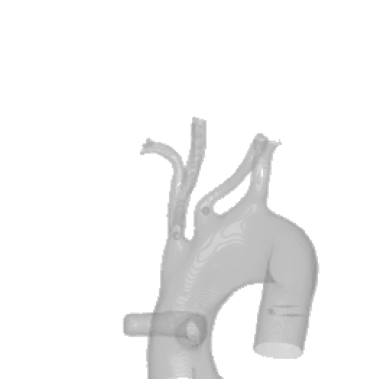

In [603]:
img = cv2.imread('./Heatmap/aorta_2.png', 0)
img = np.where(img>=215, 255, img)[:,:, np.newaxis]
img = np.tile(img,3)

force_img = cv2.imread('./Heatmap/scene_2_bca/force.png', 0)
heatmap_img = cv2.applyColorMap(force_img, cv2.COLORMAP_JET)
fin = cv2.addWeighted(heatmap_img, 0.7, img, 0.3, 0)
tilled_force = np.tile(force_img[:,:,np.newaxis],3)
fin = np.where(tilled_force==30, img, heatmap_img)

plt.imshow(img, alpha=0.8)
plt.axis(False)

(0.0, 1.0, 0.0, 1.0)

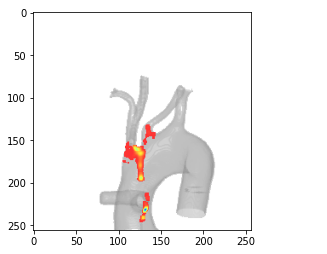

In [405]:
img = cv2.imread('./data/Figures/Heatmap/aorta_2.png', 0)
img = np.where(img>=215, 255, img)[:,:, np.newaxis]
img = np.tile(img,3)

force_img = cv2.imread('./data/Figures/Heatmap/internal/scene_2_bca/force.png', 0)
heatmap_img = cv2.applyColorMap(force_img, cv2.COLORMAP_JET)
fin = cv2.addWeighted(heatmap_img, 0.7, img, 0.3, 0)
tilled_force = np.tile(force_img[:,:,np.newaxis],3)
fin = np.where(tilled_force==30, img, heatmap_img)


plt.imshow(fin, alpha=0.8)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
# plt.colorbar(force_img, cax=cax)
plt.axis(False)

(-0.5, 255.5, 255.5, -0.5)

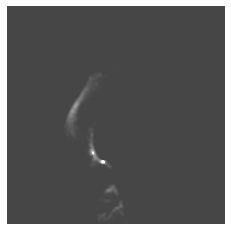

In [6]:
img = cv2.imread('./Heatmap/aorta_image.png', 0)
img = np.where(img>=150,255,img)[:,:, np.newaxis]
img = np.tile(img,3)
img = np.where(img<240, img+40, img)
plt.imshow(img)
plt.axis(False)

In [8]:
import matplotlib.pyplot as plt
import numpy as np

a_1_bca_force = np.load("./benchmarking/distance_1/results/internal/PPO_scene_1_bca_MlpPolicy.npz", allow_pickle=True)['all_forces']
a_1_lca_force = np.load("./benchmarking/distance_1/results/internal/PPO_scene_1_lca_MlpPolicy.npz", allow_pickle=True)['all_forces']
a_2_bca_force = np.load("./benchmarking/distance_1/results/internal/PPO_scene_2_bca_MlpPolicy.npz", allow_pickle=True)['all_forces']
a_2_lca_force = np.load("./benchmarking/distance_1/results/internal/PPO_scene_2_lca_MlpPolicy.npz", allow_pickle=True)['all_forces']

In [10]:
a_1_bca_force.shape

(23125,)

ValueError: List of boxplot statistics and `positions` values must have same the length

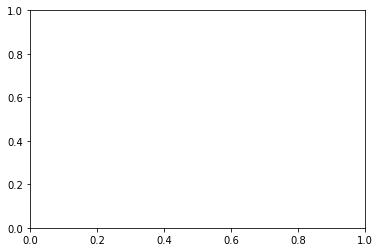

In [12]:
import matplotlib.pyplot as plt
import numpy as np

data_a = a_1_bca_force
data_b = a_1_lca_force

ticks = ['A', 'B', 'C']

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure()

bpl = plt.boxplot(data_a, positions=np.array(range(data_a.shape[0]))*2.0-0.4, sym='', widths=0.6)
bpr = plt.boxplot(data_b, positions=np.array(range(data_b.shape[0]))*2.0+0.4, sym='', widths=0.6)
set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='Apples')
plt.plot([], c='#2C7BB6', label='Oranges')
plt.legend()

plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-2, len(ticks)*2)
plt.ylim(0, 8)
plt.tight_layout()
plt.savefig('boxcompare.png')

<AxesSubplot:>

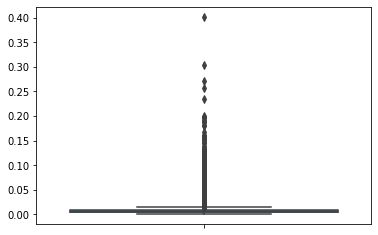

In [57]:
import seaborn as sns
sns.boxplot(y=a_1_bca_force, orient="v")

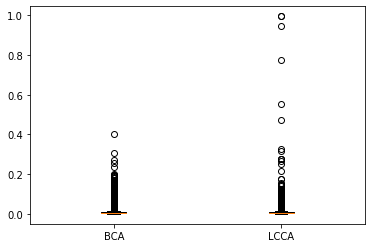

In [47]:
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
plt.boxplot([a_1_bca_force, a_1_lca_force], labels=["BCA", "LCCA"],positions=[0,1])
plt.show()

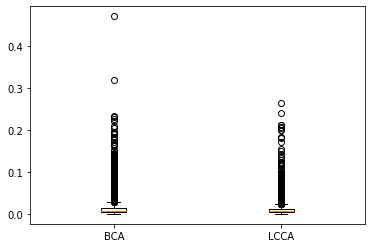

In [48]:
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
plt.boxplot([a_2_bca_force, a_2_lca_force], labels=["BCA", "LCCA"])
plt.show()

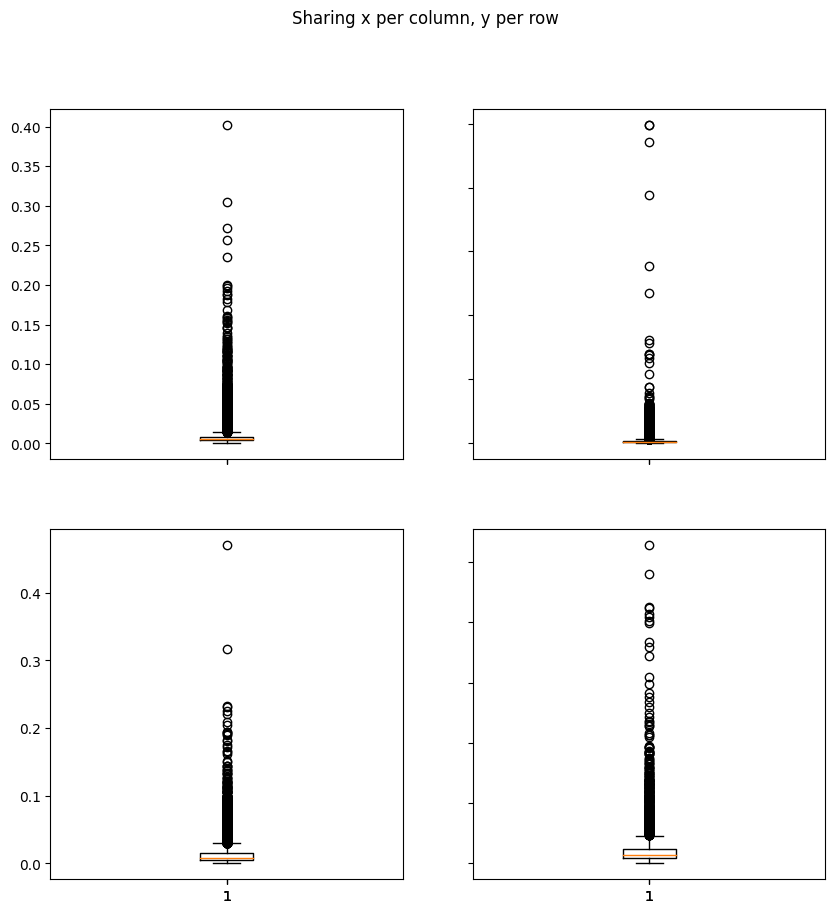

In [58]:
plt.style.use("default")
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=False,figsize=(10,10))
fig.suptitle('Sharing x per column, y per row')
ax1.boxplot(a_1_bca_force)
ax2.boxplot(a_1_lca_force)
ax3.boxplot(a_2_bca_force)
ax4.boxplot(a_2_lca_force)

for ax in fig.get_axes():
    ax.label_outer()

ValueError: List of boxplot statistics and `positions` values must have same the length

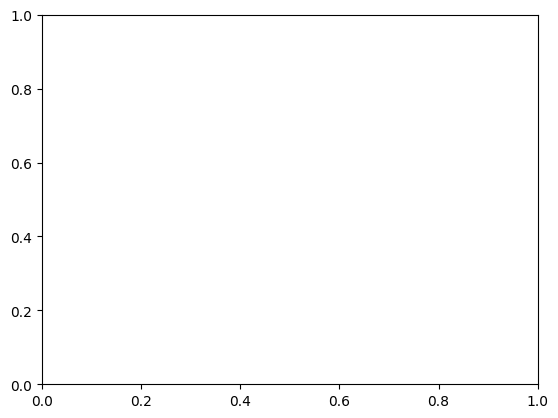

In [63]:
# import the matplotlib package
import matplotlib.pyplot as plt

# import the numpy package
import numpy as np

# create 2 - sample a 3-Dim array, that measures
# the summer and winter rain fall amount
summer_rain = [[3, 5, 7], [15, 17, 12, 12, 15], [26, 21, 15]]
winter_rain = [[16, 14, 12], [31, 20, 25, 23, 28], [29, 31, 35, 41]]

# the list named ticks, summarizes or groups
# the summer and winter rainfall as low, mid
# and high
ticks = ['Low', 'Mid', 'High']

# create a boxplot for two arrays separately,
# the position specifies the location of the
# particular box in the graph,
# this can be changed as per your wish. Use width
# to specify the width of the plot
summer_rain_plot = plt.boxplot(a_1_bca_force,positions=np.array(np.arange(len(a_1_bca_force)))*2.0-0.35, widths=0.6)
winter_rain_plot = plt.boxplot(a_1_lca_force, positions=np.array(np.arange(len(a_1_lca_force)))*2.0+0.35, widths=0.6)

# each plot returns a dictionary, use plt.setp()
# function to assign the color code
# for all properties of the box plot of particular group
# use the below function to set color for particular group,
# by iterating over all properties of the box plot
def define_box_properties(plot_name, color_code, label):
    for k, v in plot_name.items():
        plt.setp(plot_name.get(k), color=color_code)
    # use plot function to draw a small line to name the legend.
    plt.plot([], c=color_code, label=label)
    plt.legend()


# setting colors for each groups
define_box_properties(summer_rain_plot, '#D7191C', 'Summer')
define_box_properties(winter_rain_plot, '#2C7BB6', 'Winter')

# set the x label values
plt.xticks(np.arange(0, len(ticks) * 2, 2), ticks)

# set the limit for x axis
plt.xlim(-2, len(ticks)*2)

# set the limit for y axis
plt.ylim(0, 50)

# set the title
plt.title('Grouped boxplot using matplotlib')


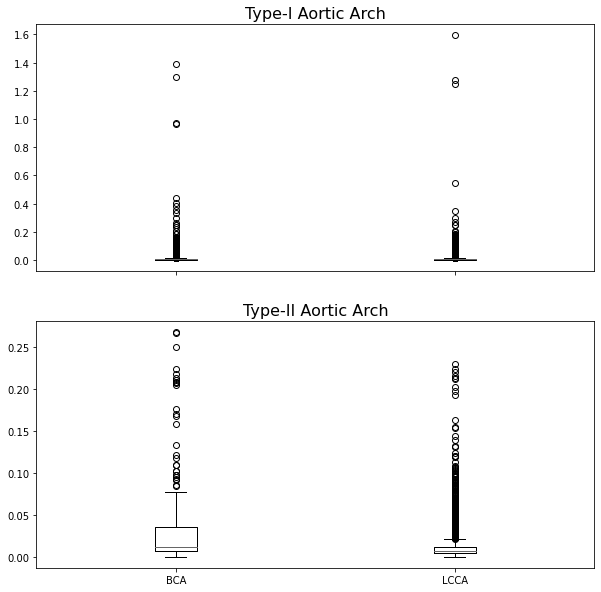

In [567]:
plt.style.use("grayscale")
subtitle size
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=False, sharey=False,figsize=(10,10))
fig.patch.set_facecolor('xkcd:white')
# fig.suptitle('Sharing x per column, y per row')
ax1.boxplot([a_1_bca_force, a_1_lca_force, ], labels=["BCA", "LCCA"])
ax1.set_title("Type-I Aortic Arch",size=16)
ax2.boxplot([a_2_bca_force, a_2_lca_force], labels=["BCA", "LCCA"])
ax2.set_title("Type-II Aortic Arch",size=16)

for ax in fig.get_axes():
    ax.label_outer()

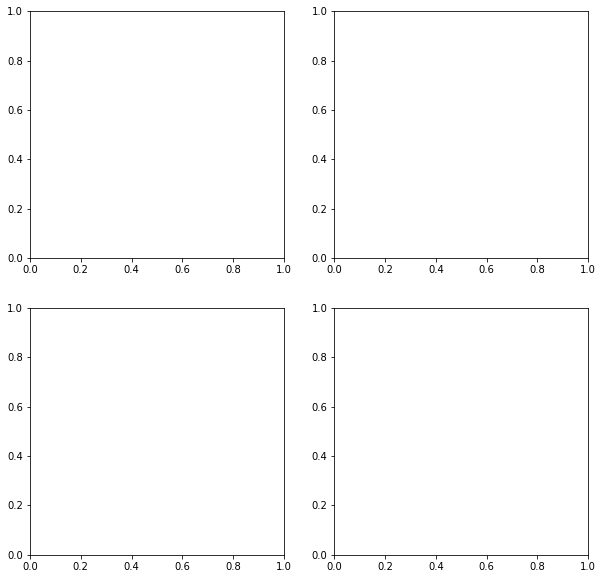

In [131]:
# image = plt.imread("./Catheter/0.png")

fig, ax = plt.subplots(2,2, figsize=(10,10))
fig.patch.set_facecolor('xkcd:white')
image_num = 0
for i in range(2):
    for j in range(3):
        image = plt.imread(f"./data/Figures/Catheter/close-up/{image_num}.png")[:,:,0]
        plt.imsave(f"./data/Figures/Catheter/close-up/binary/{image_num}.png", image,cmap="gray")
#         image = np.where(image<=0.3,0,image)
#         ax[i,j].imshow(image, cmap="gray")
#         ax[i,j].axis(False)
        image_num += 30
# plt.show()

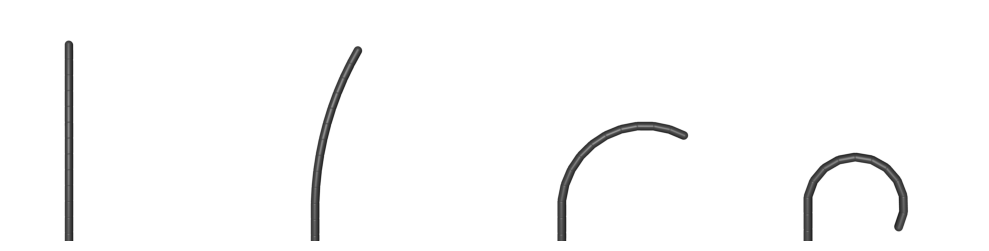

In [604]:
image = plt.imread("./Catheter/0.png")

fig, ax = plt.subplots(1,4, figsize=(10,10))
fig.patch.set_facecolor('xkcd:white')
image_num = 0
for i in range(4):
    image = plt.imread(f"./Catheter/{image_num}.png")
    ax[i].imshow(image)
    ax[i].axis(False)
    image_num += 40
plt.tight_layout()
plt.show()

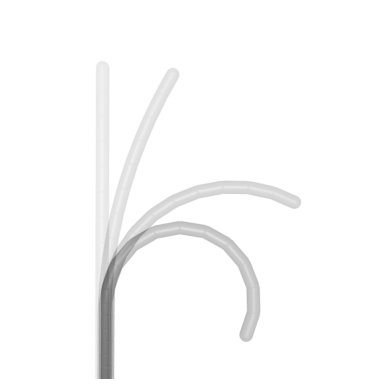

In [670]:
import matplotlib.pyplot as plt
import numpy as np


def func3(x, y):
    return (1 - x / 2 + x**5 + y**3) * np.exp(-(x**2 + y**2))


# make these smaller to increase the resolution
dx, dy = 0.05, 0.05

x = np.arange(-3.0, 3.0, dx)
y = np.arange(-3.0, 3.0, dy)
X, Y = np.meshgrid(x, y)

# when layering multiple images, the images need to have the same
# extent.  This does not mean they need to have the same shape, but
# they both need to render to the same coordinate system determined by
# xmin, xmax, ymin, ymax.  Note if you use different interpolations
# for the images their apparent extent could be different due to
# interpolation edge effects

fig = plt.figure(frameon=False)
im1 = plt.imshow(plt.imread("./Catheter/0.png"),alpha=.3)
im2 = plt.imshow(plt.imread("./Catheter/40.png"),alpha=.3)
im3 = plt.imshow(plt.imread("./Catheter/80.png"),alpha=.3)
im4 = plt.imshow(plt.imread("./Catheter/120.png"),alpha=.3)

# im1 = plt.imshow(Z1, cmap=plt.cm.gray, interpolation='nearest',
#                  extent=extent)

# Z2 = func3(X, Y)

# im2 = plt.imshow(Z2, cmap=plt.cm.viridis, alpha=.9, interpolation='bilinear',
#                  extent=extent)
plt.axis(False)
plt.show()

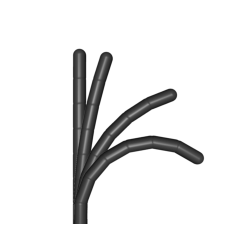

In [151]:
import matplotlib.pyplot as plt
import numpy as np
path_to_catheter = "./data/Figures/Catheter/close-up/"
im1 = plt.imread(f"{path_to_catheter}/0.png")[:,:,1]
m1 = np.where(im1>=0.8,1,0)
im2 = plt.imread(f"{path_to_catheter}/1.png")[:,:,1]
im2 = shift_image(im2,pixel=20)
m2 = np.where(im2>=0.8,1,0)
im3 = plt.imread(f"{path_to_catheter}/2.png")[:,:,1]
im3 = shift_image(im3,pixel=35)
m3 = np.where(im3>=0.8,1,0)
im4 = plt.imread(f"{path_to_catheter}/3.png")[:,:,1]
im4 = shift_image(im4,pixel=55)
m4 = np.where(im4>=0.8,1,0)
image = np.where(m2==0,im2,im1)
image = np.where(m3==0,im3,image)
image = np.where(m4==0,im4,image)
plt.axis(False)
plt.imshow(image, cmap="gray")
# plt.imshow(im1[:,:,1], cmap = "gray")

In [105]:
 plt.imsave(f"{path_to_catheter}/3.png", np.where(im4 >=0.8,1,im4))

In [99]:
print(im1.min())

0.90588236


(-0.5, 999.5, 999.5, -0.5)

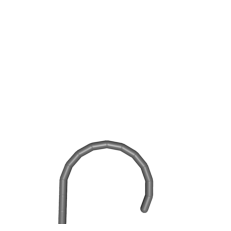

In [111]:
plt.imshow(im4, cmap="gray")
plt.axis(False)

In [45]:
def shift_image(image,pixel=1):
    new_image= np.zeros_like(image)
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            if y +pixel >= 1000:
                new_image[x,y] = 1
            else:
                new_image[x,y] = image[x,y+pixel]
    return(new_image)
        
shift_image(im1,pixel=20)

array([[0.90588236, 0.90588236, 0.90588236, ..., 1.        , 1.        ,
        1.        ],
       [0.90588236, 0.90588236, 0.90588236, ..., 1.        , 1.        ,
        1.        ],
       [0.90588236, 0.90588236, 0.90588236, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.90588236, 0.90588236, 0.90588236, ..., 1.        , 1.        ,
        1.        ],
       [0.90588236, 0.90588236, 0.90588236, ..., 1.        , 1.        ,
        1.        ],
       [0.90588236, 0.90588236, 0.90588236, ..., 1.        , 1.        ,
        1.        ]], dtype=float32)

6


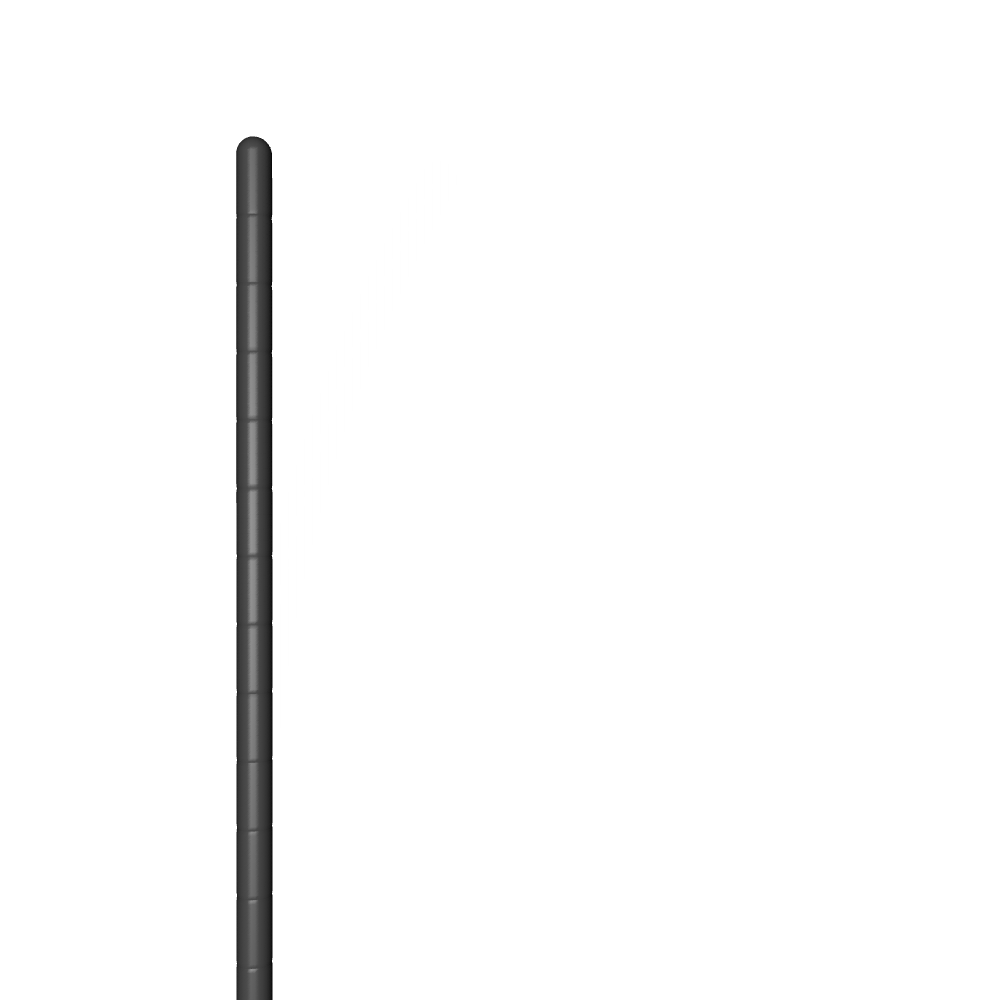

In [659]:
from PIL import Image
  
img1 = Image.open(r"./Catheter/0.png").convert("L")

img2 = Image.open(r"./Catheter/40.png").convert("L")
arr = np.asarray(img2)
print(arr.min())
mask = np.where(arr<=100,0,1)
mask = Image.fromarray(mask, 'L')
# No transparency mask specified, 
# simulating an raster overlay
img1.paste(img2, mask=mask)
display(img1)
# img1.paste?

In [593]:
def point2pixel(self, point, camera_matrix):
        """Transforms from world coordinates to pixel coordinates."""

        # Point
        x, y, z = point

        xs, ys, s = camera_matrix.dot(np.array([x, y, z, 1.0]))
        return round(xs/s), round(ys/s)

top_camera_matrix = np.array([[-309.01933598, 0., 127.5, -195.23380838],
                              [0., 309.01933598, 127.5, -188.6529326],
                              [0., 0., 1., -1.55]])


In [594]:

bca_1 = [-0.029918, 0.055143, 1.0431]
lcca_1 = [0.003474, 0.055143, 1.0357]
bca_2 = [-0.013049, -0.077002, 1.0384]
lcca_2 = [0.019936, -0.048568, 1.0315]
aorta_1 = plt.imread("./Heatmap/aorta_1.png")
aorta_2 = plt.imread("./Heatmap/aorta_2.png")

In [2]:
def shift_image(image,pixel=1):
    new_image= np.zeros_like(image)
    for z in range(image.shape[-1]):
        for x in range(image.shape[0]):
            for y in range(image.shape[1]):
                if y + pixel >= 1000:
                    new_image[x,y,z] = 1
                else:
                    new_image[x,y,z] = image[x,y+pixel,z]
    return(new_image)

(1000, 1000, 4)
(1000, 1000, 4)
(1000, 1000, 4)
(1000, 1000, 4)


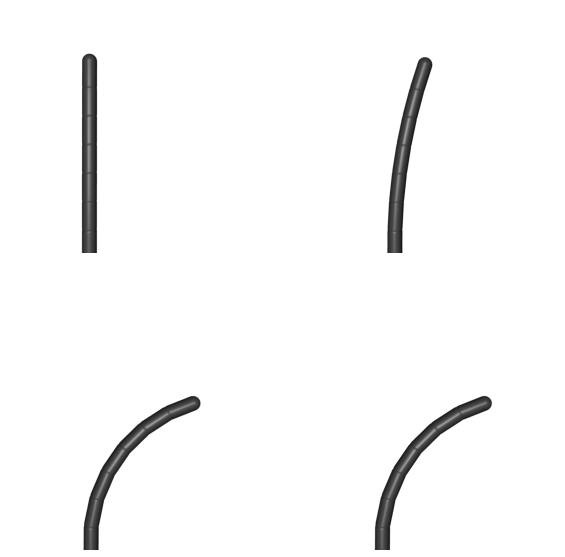

In [9]:
im1 = plt.imread("./data/Figures/Catheter/close-up/0.png")
im2 = plt.imread("./data/Figures/Catheter/close-up/1.png")
im3 = plt.imread("./data/Figures/Catheter/close-up/2.png")
im4 = plt.imread("./data/Figures/Catheter/close-up/3.png")

images = [im1,im2,im3,im4]
def plot_four(images):
    fig, ax = plt.subplots(2,2, figsize=(10,10))
    fig.patch.set_facecolor('xkcd:white')
    image_num = 0
    for i in range(2):
        for j in range(2):
            print(images[image_num].shape)
#             image = np.where(image<=0.3,0,image)
            ax[i,j].imshow(images[image_num], cmap="gray")
            ax[i,j].axis(False)
            image_num += 1
    plt.show()
    
plot_four(images)

In [64]:
plt.imsave("./data/Figures/Catheter/close-up/3.png", im4, cmap="gray")

NameError: name 'im4' is not defined

# Reward Plots

In [438]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

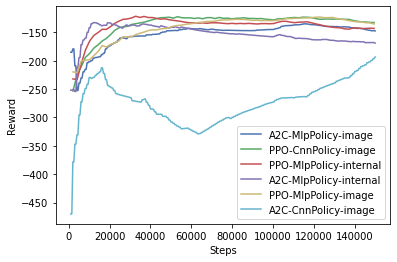

In [478]:

# df = pd.DataFrame(columns=["Wall time", "Step", "Value"])
plt.style.use("seaborn-deep")
def make_plot(aorta, target):
#     fig, ax = plt.subplots(2,2, figsize=(10,10))
    path = "./data/rewards/"
    for filename in os.listdir(path):
        file = os.path.join(path, filename)
        filename = filename.split("-")[1]
        filename = filename.split("_")
        if filename[1] == "1":
            filename.pop(1)
#         print(filename)
        if filename[3] == aorta:
            if filename[4] == target:
                df = pd.read_csv(file)
                df = df[df["Step"] <= 150000]
                plt.plot(df["Step"], df["Value"], label=f"{filename[1]}-{filename[5]}-{filename[0]}")
    
    plt.legend(loc="lower right")
    plt.xlabel("Steps")
    plt.ylabel("Reward")
    plt.show()


make_plot("1", "lca")


['image', '1', 'A2C', 'scene', '2', 'bca', 'MlpPolicy', '0']
['image', '1', 'A2C', 'scene', '1', 'lca', 'MlpPolicy', '0']
['image', '1', 'PPO', 'scene', '1', 'lca', 'CnnPolicy', '0']
['internal', 'PPO', 'scene', '2', 'bca', 'MlpPolicy', '0']
['internal', 'PPO', 'scene', '2', 'lca', 'MlpPolicy', '0']
['image', '1', 'PPO', 'scene', '2', 'bca', 'CnnPolicy', '0']
['internal', 'PPO', 'scene', '1', 'lca', 'MlpPolicy', '0']
['image', '1', 'A2C', 'scene', '2', 'bca', 'CnnPolicy', '0']
['image', '1', 'PPO', 'scene', '1', 'bca', 'MlpPolicy', '0']
['image', '1', 'A2C', 'scene', '1', 'bca', 'MlpPolicy', '0']
['internal', 'A2C', 'scene', '2', 'lca', 'MlpPolicy', '0']
['image', '1', 'PPO', 'scene', '2', 'lca', 'MlpPolicy', '0']
['image', '1', 'A2C', 'scene', '2', 'lca', 'CnnPolicy', '0']
['image', '1', 'A2C', 'scene', '1', 'bca', 'CnnPolicy', '0']
['image', '1', 'PPO', 'scene', '2', 'lca', 'CnnPolicy', '0']
['internal', 'A2C', 'scene', '1', 'lca', 'MlpPolicy', '0']
['image', '1', 'PPO', 'scene', '1'

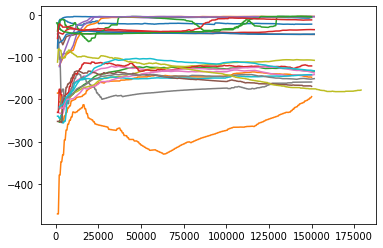

In [448]:
path = "./data/rewards/"
# df = pd.DataFrame(columns=["Wall time", "Step", "Value"])

def make_plot(aorta, target):
    for filename in os.listdir(path):
        file = os.path.join(path, filename)
        filename = filename.split("-")[1]
        filename = filename.split("_")
        if filename[1] == "1":
            filename.pop(1)
        if filename[4] == aorta:
            if filename[5] == target:
                df = pd.read_csv(file)
                plt.plot(df["Step"], df["Value"], label=f"{filename[0]}-{filename[1}")
        
        
    
#     pd.merge(left=df, right=pd.read_csv(file), how='outer', left_on='Step', right_on='Step')



In [436]:
df.describe()

,Wall time,Step,Value
count,0,0,0
unique,0,0,0
top,NaN,NaN,NaN
freq,NaN,NaN,NaN
